In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("sales_data_cleaned.xlsx")
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [ ]:
df["total_cost"] = df["order_quantity"] * df["cost"]
df["profit"] = df["revenue"] - df["total_cost"]
df["profit_margin_pct"] = df["profit"] / df["revenue"] * 100

df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


### EDA

In [6]:
print(df.columns.tolist())

['order_number', 'order_date', 'customer_name', 'channel', 'product_name', 'order_quantity', 'unit_price', 'revenue', 'cost', 'state', 'county', 'state_name', 'region', 'lat', 'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct']


In [7]:
df["order_month"] = df["order_date"].dt.to_period("M")
monthly_sales = df.groupby("order_month")["revenue"].sum()

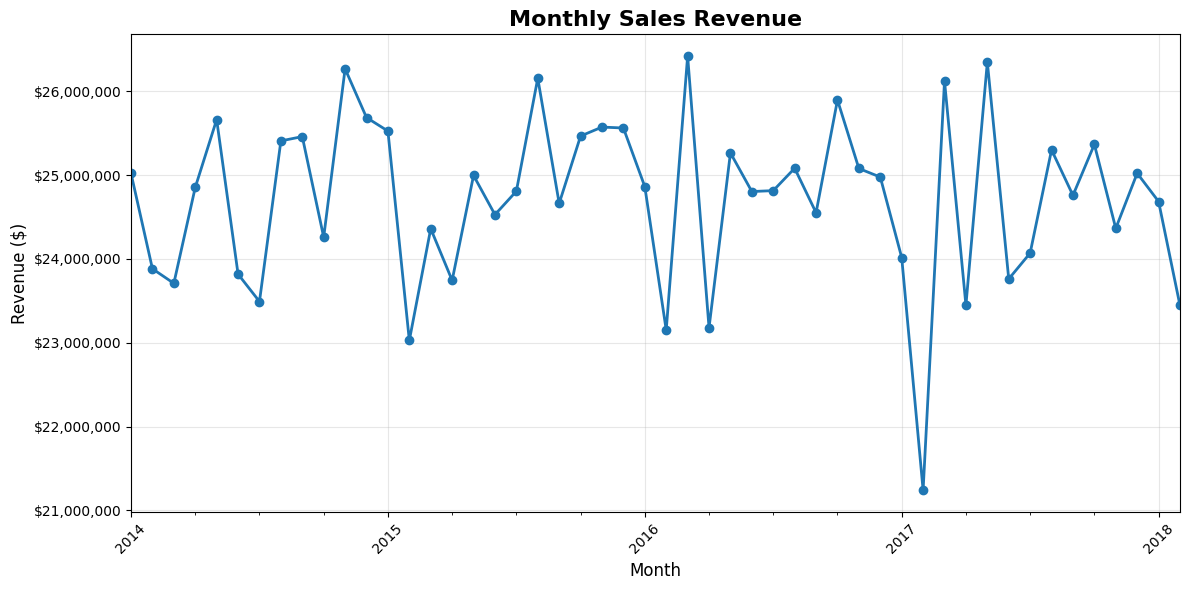

In [ ]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", linewidth=2, markersize=6)
plt.title("Monthly Sales Revenue", fontsize=16, fontweight="bold")
plt.ylabel("Revenue ($)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

plt.tight_layout()
plt.show()

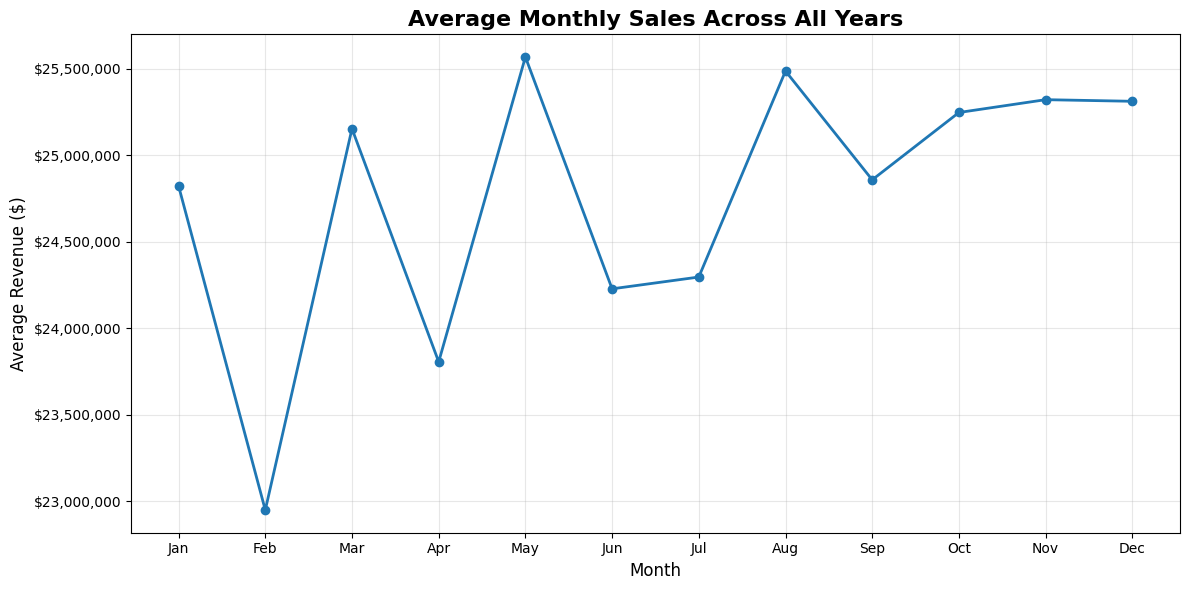

In [ ]:
df_filtered = df[~df["order_month"].isin(["2018-01", "2018-02"])]

df_filtered["year"] = df_filtered["order_date"].dt.year
df_filtered["month"] = df_filtered["order_date"].dt.month

monthly_totals = df_filtered.groupby(["year", "month"])["revenue"].sum().reset_index()
avg_monthly_sales = monthly_totals.groupby("month")["revenue"].mean()

plt.figure(figsize=(12, 6))
avg_monthly_sales.plot(kind="line", marker="o", linewidth=2, markersize=6)
plt.title("Average Monthly Sales Across All Years", fontsize=16, fontweight="bold")
plt.ylabel("Average Revenue ($)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

month_names = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
plt.xticks(range(1, 13), month_names)

plt.tight_layout()
plt.show()

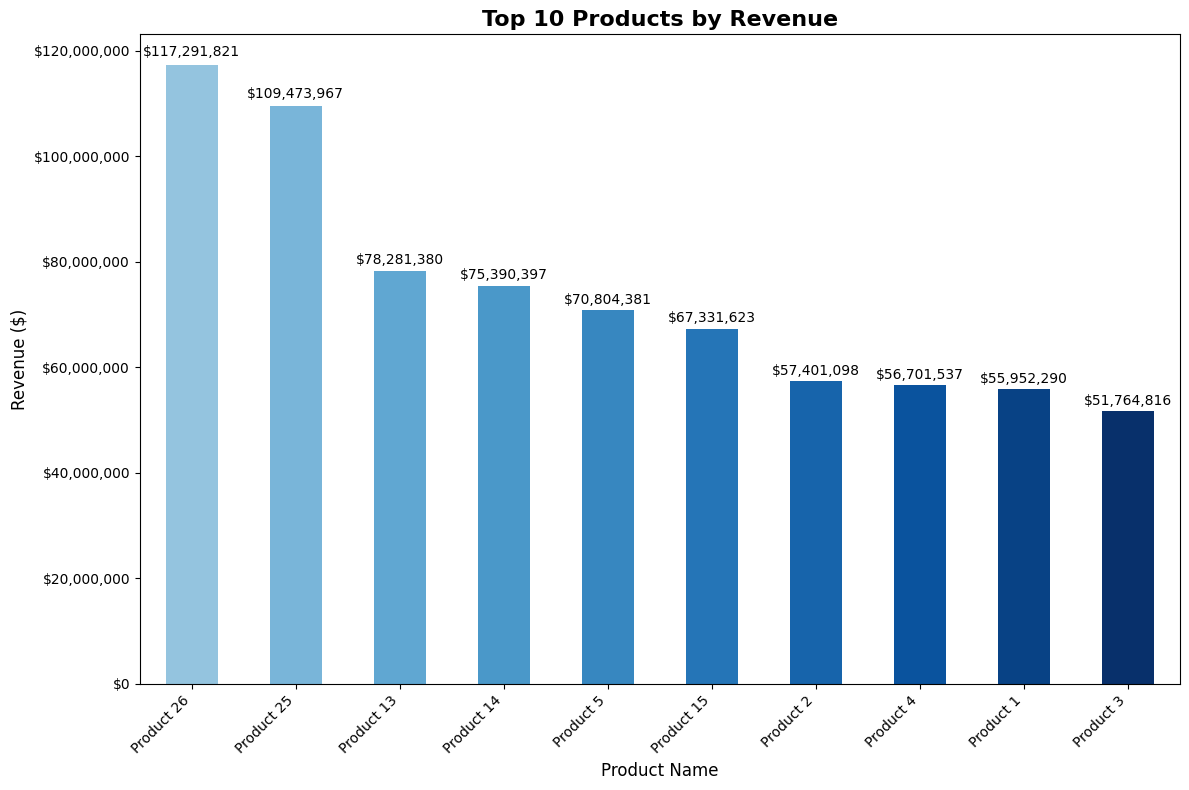

In [27]:
top_10_products = df.groupby("product_name")["revenue"].sum().nlargest(10)

plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_10_products)))
bars = top_10_products.plot(kind="bar", color=colors)
plt.title("Top 10 Products by Revenue", fontsize=16, fontweight="bold")
plt.ylabel("Revenue ($)", fontsize=12)
plt.xlabel("Product Name", fontsize=12)
plt.xticks(rotation=45, ha="right")

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

for i, v in enumerate(top_10_products.values):
    ax.text(i, v + v * 0.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

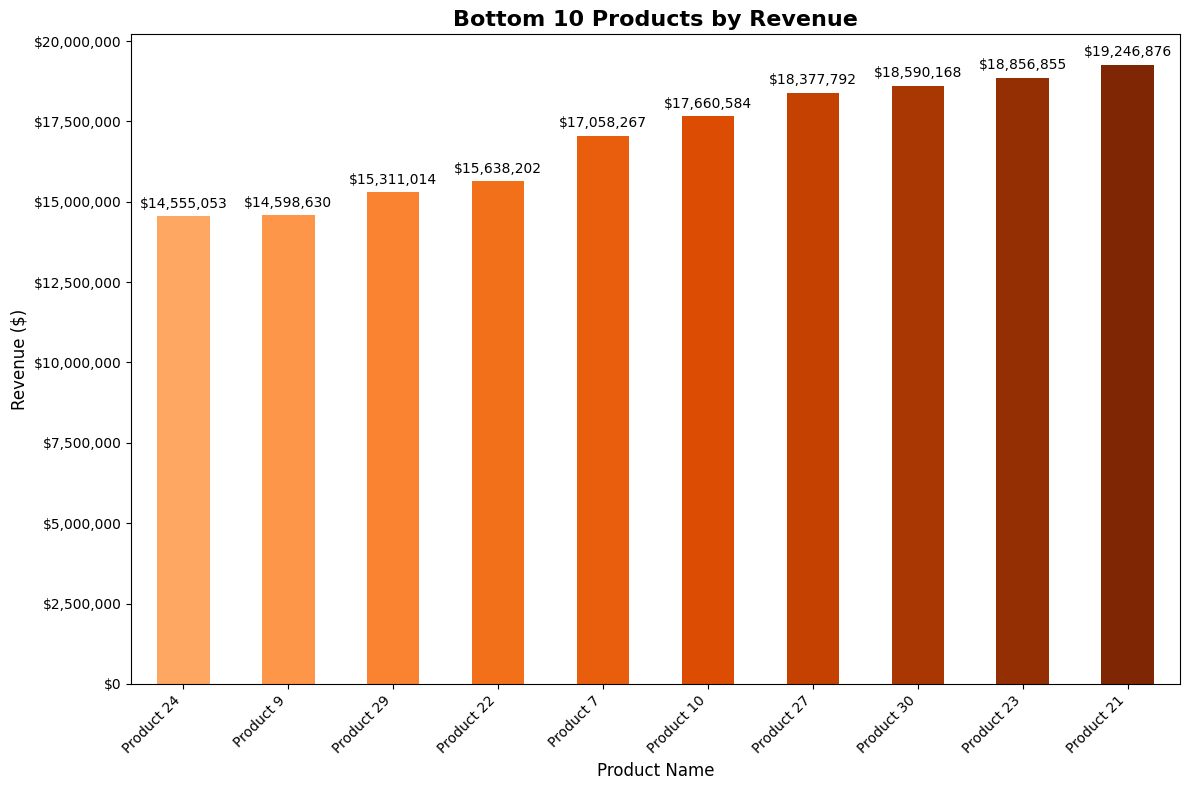

In [28]:
top_10_products = df.groupby("product_name")["revenue"].sum().nsmallest(10)

plt.figure(figsize=(12, 8))
colors = plt.cm.Oranges(np.linspace(0.4, 1, len(top_10_products)))
bars = top_10_products.plot(kind="bar", color=colors)
plt.title("Bottom 10 Products by Revenue", fontsize=16, fontweight="bold")
plt.ylabel("Revenue ($)", fontsize=12)
plt.xlabel("Product Name", fontsize=12)
plt.xticks(rotation=45, ha="right")

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

for i, v in enumerate(top_10_products.values):
    ax.text(i, v + v * 0.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

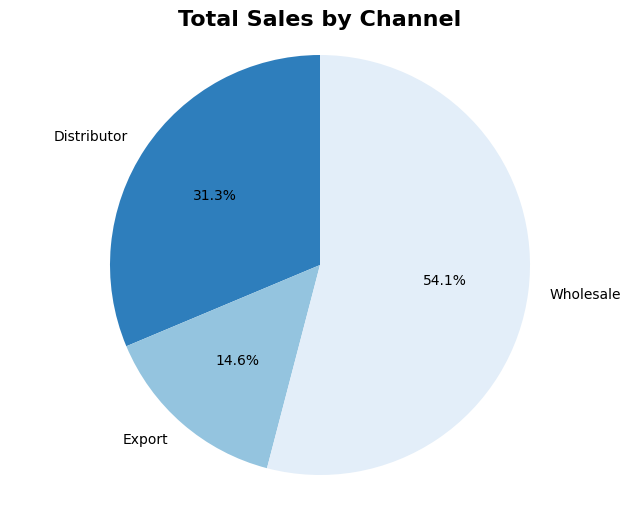

In [ ]:
channel_sales = df.groupby("channel")["revenue"].sum()

plt.figure(figsize=(8, 6))
colors = plt.cm.Blues_r(np.linspace(0.3, 0.9, len(channel_sales)))
plt.pie(
    channel_sales.values,
    labels=channel_sales.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
)
plt.title("Total Sales by Channel", fontsize=16, fontweight="bold")
plt.axis("equal")
plt.show()

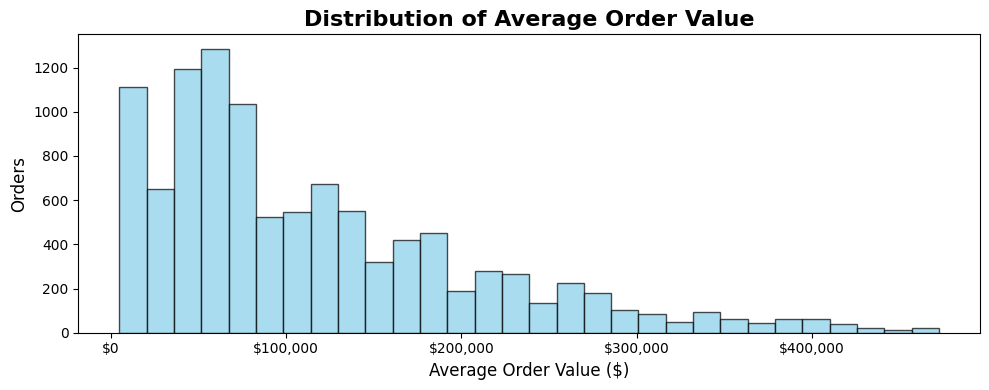

In [ ]:
aov = df.groupby("order_number")["revenue"].sum()

plt.figure(figsize=(10, 4))
plt.hist(aov, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Average Order Value", fontsize=16, fontweight="bold")
plt.xlabel("Average Order Value ($)", fontsize=12)
plt.ylabel("Orders", fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

plt.tight_layout()
plt.show()

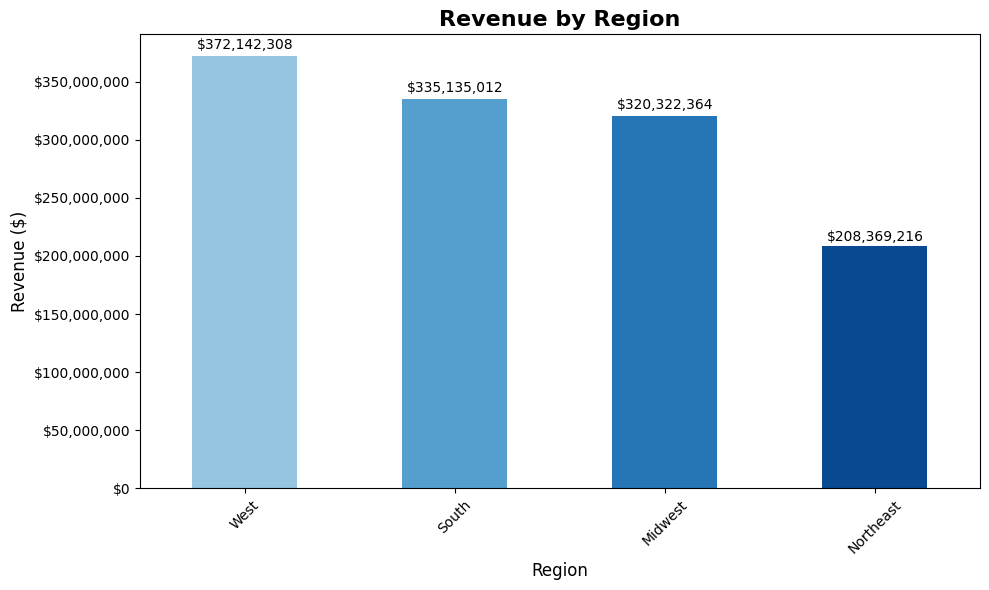

In [ ]:
region_revenue = df.groupby("region")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(region_revenue)))
bars = region_revenue.plot(kind="bar", color=colors)
plt.title("Revenue by Region", fontsize=16, fontweight="bold")
plt.ylabel("Revenue ($)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

for i, v in enumerate(region_revenue.values):
    ax.text(i, v + v * 0.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

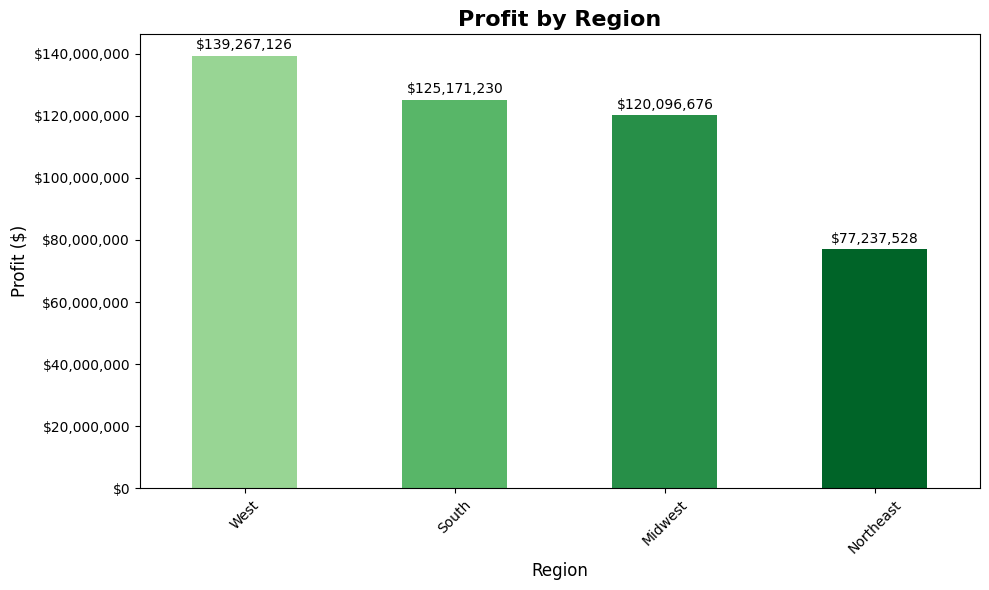

In [ ]:
region_profit = df.groupby("region")["profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(region_profit)))
bars = region_profit.plot(kind="bar", color=colors)
plt.title("Profit by Region", fontsize=16, fontweight="bold")
plt.ylabel("Profit ($)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

for i, v in enumerate(region_profit.values):
    ax.text(i, v + v * 0.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

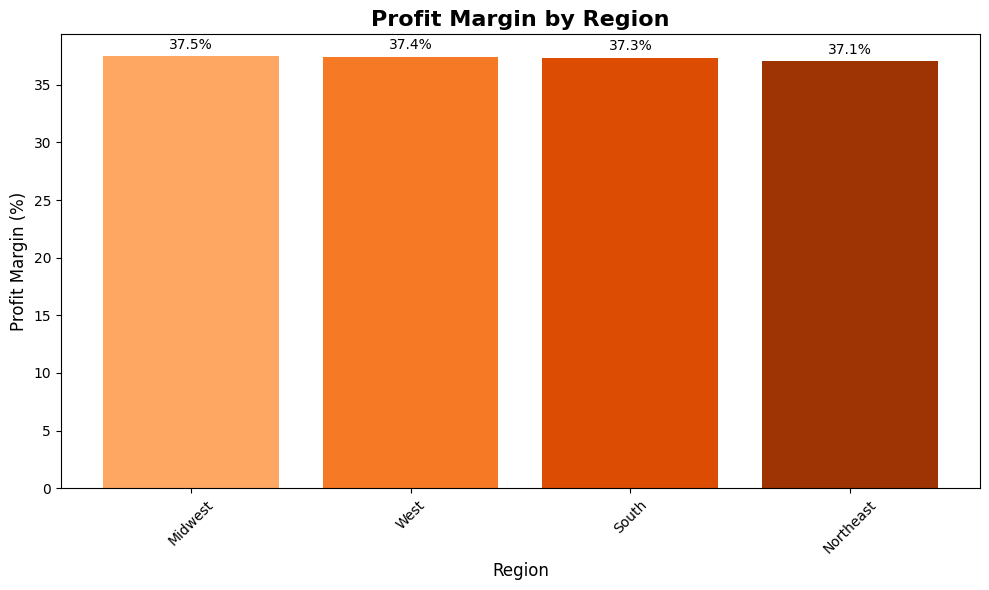

In [ ]:
region_stats = (
    df.groupby("region").agg({"revenue": "sum", "profit": "sum"}).reset_index()
)
region_stats["profit_margin"] = (region_stats["profit"] / region_stats["revenue"]) * 100
region_stats = region_stats.sort_values("profit_margin", ascending=False)

plt.figure(figsize=(10, 6))
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(region_stats)))
bars = plt.bar(region_stats["region"], region_stats["profit_margin"], color=colors)
plt.title("Profit Margin by Region", fontsize=16, fontweight="bold")
plt.ylabel("Profit Margin (%)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(region_stats["profit_margin"]):
    plt.text(i, v + v * 0.01, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

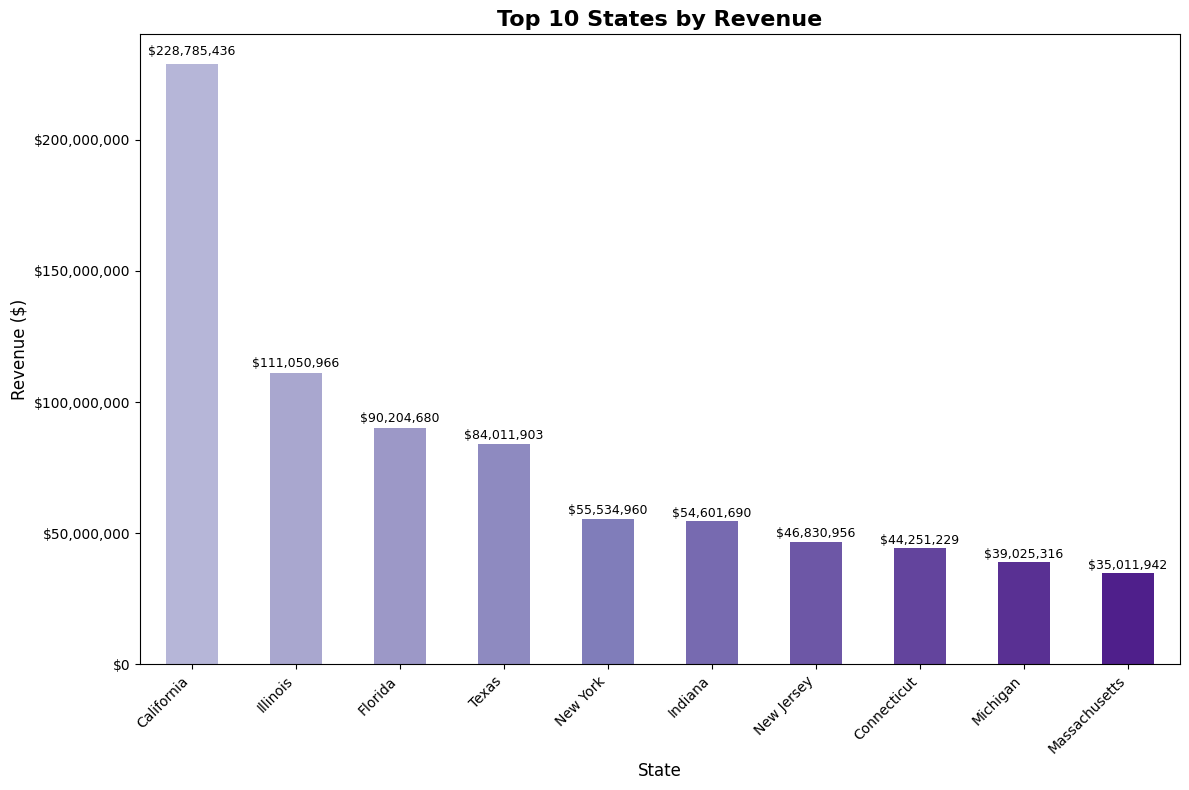

In [ ]:
state_revenue = df.groupby("state_name")["revenue"].sum().nlargest(10)

plt.figure(figsize=(12, 8))
colors = plt.cm.Purples(np.linspace(0.4, 0.9, len(state_revenue)))
bars = state_revenue.plot(kind="bar", color=colors)
plt.title("Top 10 States by Revenue", fontsize=16, fontweight="bold")
plt.ylabel("Revenue ($)", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=45, ha="right")

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

for i, v in enumerate(state_revenue.values):
    ax.text(i, v + v * 0.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

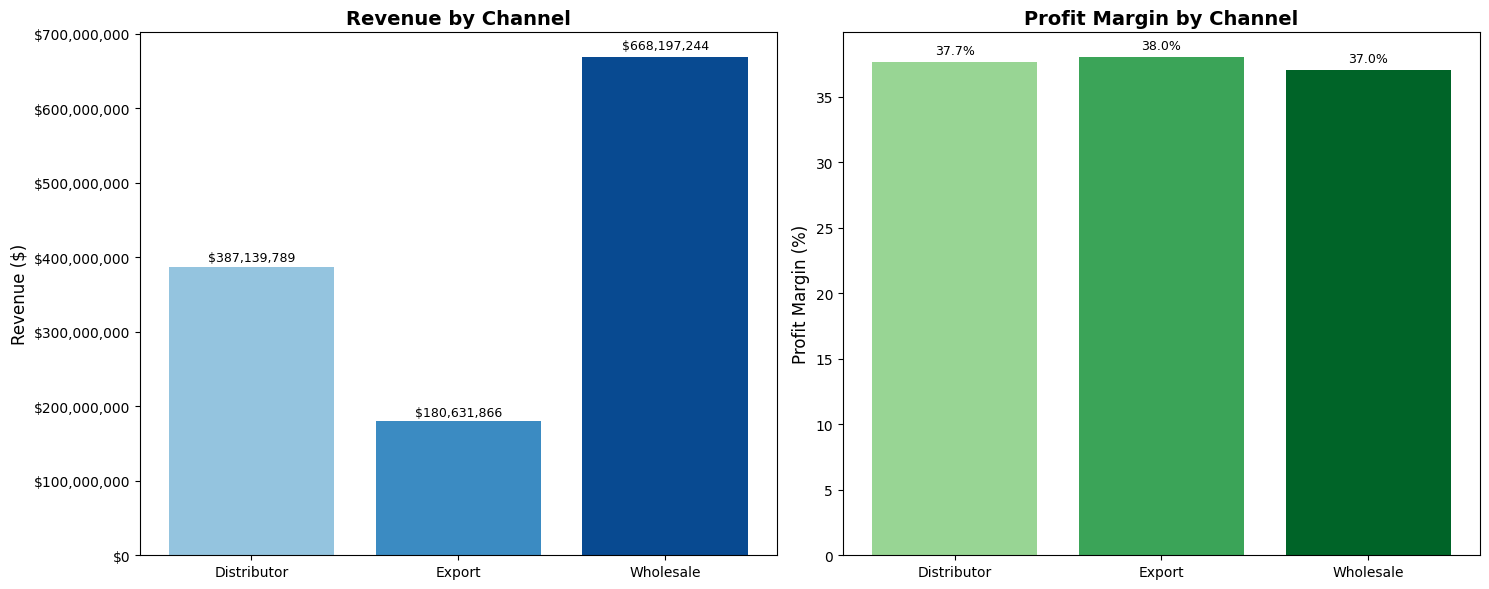

In [ ]:
channel_stats = (
    df.groupby("channel").agg({"revenue": "sum", "profit": "sum"}).reset_index()
)
channel_stats["profit_margin"] = (
    channel_stats["profit"] / channel_stats["revenue"]
) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors1 = plt.cm.Blues(np.linspace(0.4, 0.9, len(channel_stats)))
bars1 = ax1.bar(channel_stats["channel"], channel_stats["revenue"], color=colors1)
ax1.set_title("Revenue by Channel", fontsize=14, fontweight="bold")
ax1.set_ylabel("Revenue ($)", fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))
for i, v in enumerate(channel_stats["revenue"]):
    ax1.text(i, v + v * 0.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

colors2 = plt.cm.Greens(np.linspace(0.4, 0.9, len(channel_stats)))
bars2 = ax2.bar(channel_stats["channel"], channel_stats["profit_margin"], color=colors2)
ax2.set_title("Profit Margin by Channel", fontsize=14, fontweight="bold")
ax2.set_ylabel("Profit Margin (%)", fontsize=12)
for i, v in enumerate(channel_stats["profit_margin"]):
    ax2.text(i, v + v * 0.01, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\moaad\AppData\Local\Temp\ipykernel_34716\1306600152.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_channel = channel_product.groupby('channel').apply(lambda x: x.nlargest(5, 'revenue')).reset_index(drop=True)


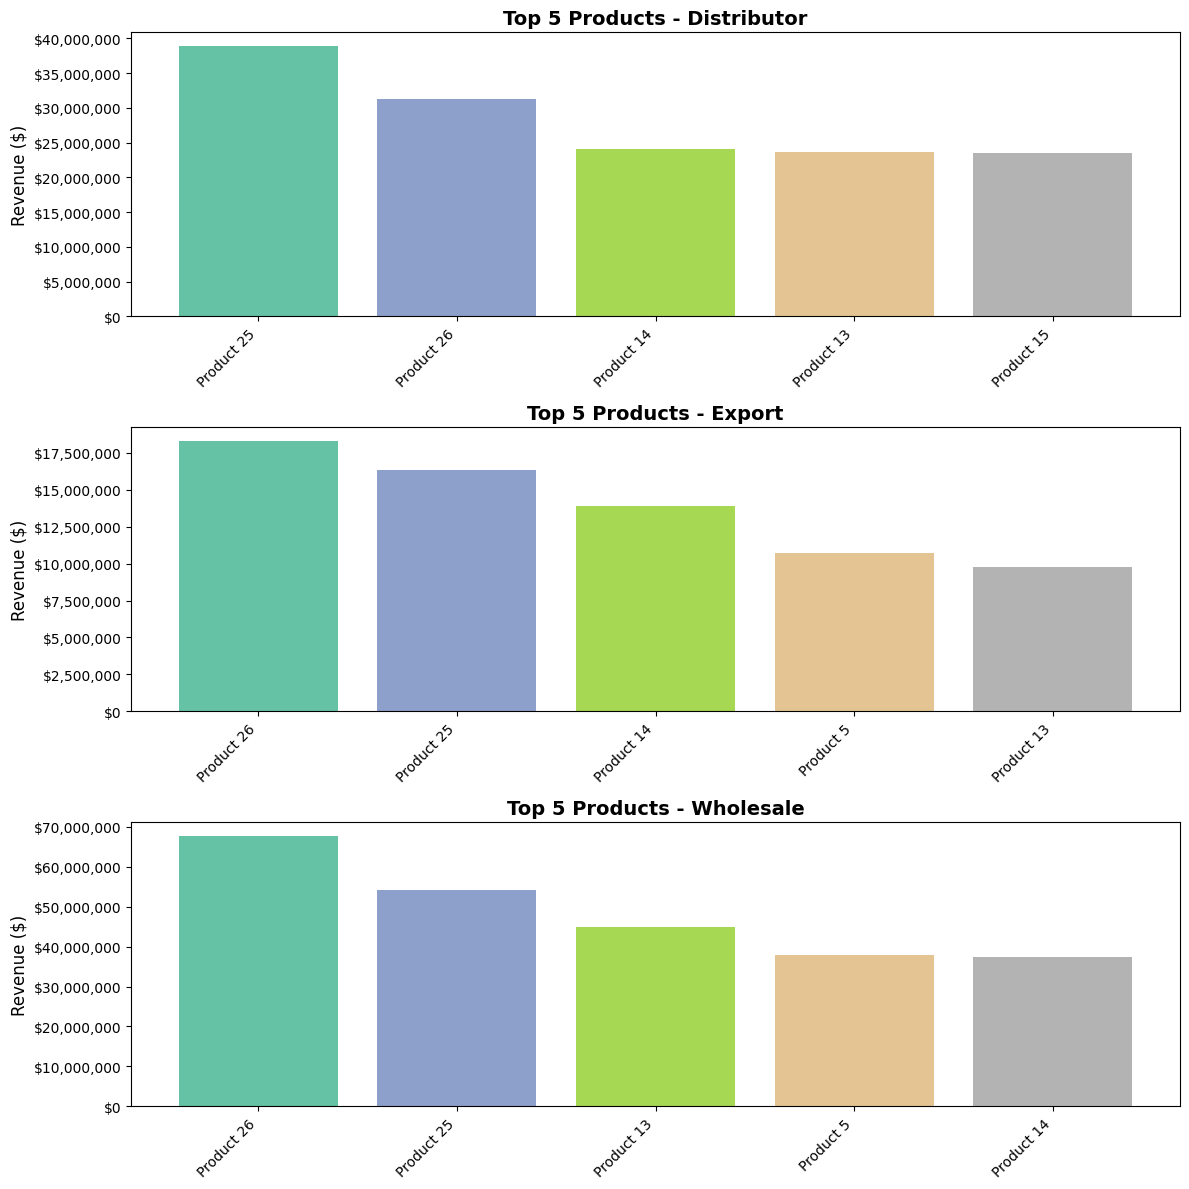

In [ ]:
channel_product = df.groupby(["channel", "product_name"])["revenue"].sum().reset_index()
top_products_by_channel = (
    channel_product.groupby("channel")
    .apply(lambda x: x.nlargest(5, "revenue"))
    .reset_index(drop=True)
)

channels = top_products_by_channel["channel"].unique()
fig, axes = plt.subplots(len(channels), 1, figsize=(12, 4 * len(channels)))

if len(channels) == 1:
    axes = [axes]

for i, channel in enumerate(channels):
    data = top_products_by_channel[top_products_by_channel["channel"] == channel]
    colors = plt.cm.Set2(np.linspace(0, 1, len(data)))

    axes[i].bar(range(len(data)), data["revenue"], color=colors)
    axes[i].set_title(f"Top 5 Products - {channel}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Revenue ($)", fontsize=12)
    axes[i].set_xticks(range(len(data)))
    axes[i].set_xticklabels(data["product_name"], rotation=45, ha="right")
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

plt.tight_layout()
plt.show()

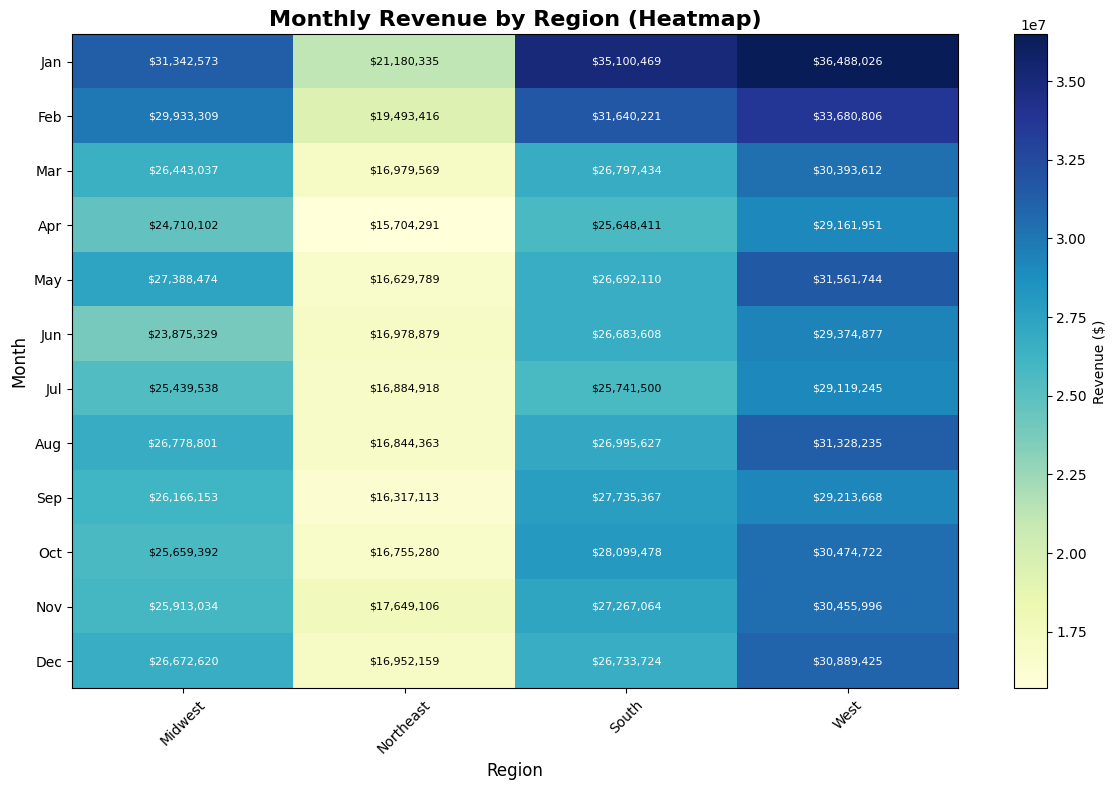

In [ ]:
df["month"] = df["order_date"].dt.month
monthly_region = df.groupby(["month", "region"])["revenue"].sum().reset_index()
heatmap_data = monthly_region.pivot(index="month", columns="region", values="revenue")

plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data.values, cmap="YlGnBu", aspect="auto")
plt.colorbar(label="Revenue ($)")

plt.title("Monthly Revenue by Region (Heatmap)", fontsize=16, fontweight="bold")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Month", fontsize=12)

plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
plt.yticks(
    range(len(heatmap_data.index)),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)

for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        plt.text(
            j,
            i,
            f"${heatmap_data.iloc[i, j]:,.0f}",
            ha="center",
            va="center",
            fontsize=8,
            color=(
                "white"
                if heatmap_data.iloc[i, j] > heatmap_data.values.mean()
                else "black"
            ),
        )

plt.tight_layout()
plt.show()

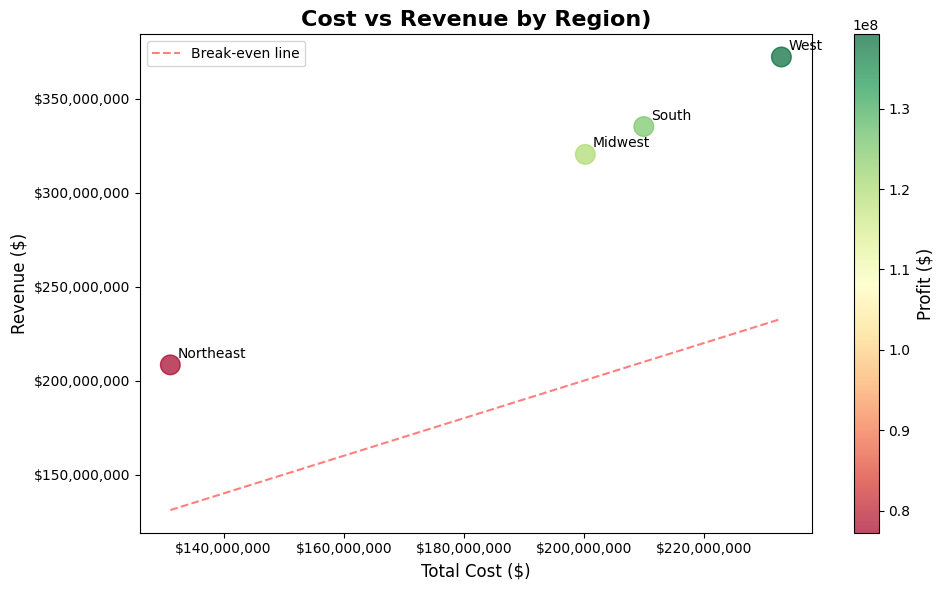

In [ ]:
cost_revenue_analysis = (
    df.groupby("region")
    .agg({"revenue": "sum", "total_cost": "sum", "profit": "sum"})
    .reset_index()
)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    cost_revenue_analysis["total_cost"],
    cost_revenue_analysis["revenue"],
    s=200,
    c=cost_revenue_analysis["profit"],
    cmap="RdYlGn",
    alpha=0.7,
)

for i, region in enumerate(cost_revenue_analysis["region"]):
    plt.annotate(
        region,
        (
            cost_revenue_analysis["total_cost"].iloc[i],
            cost_revenue_analysis["revenue"].iloc[i],
        ),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.plot(
    [
        cost_revenue_analysis["total_cost"].min(),
        cost_revenue_analysis["total_cost"].max(),
    ],
    [
        cost_revenue_analysis["total_cost"].min(),
        cost_revenue_analysis["total_cost"].max(),
    ],
    "r--",
    alpha=0.5,
    label="Break-even line",
)

plt.title("Cost vs Revenue by Region)", fontsize=16, fontweight="bold")
plt.xlabel("Total Cost ($)", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

cbar = plt.colorbar(scatter)
cbar.set_label("Profit ($)", fontsize=12)

plt.tight_layout()
plt.show()

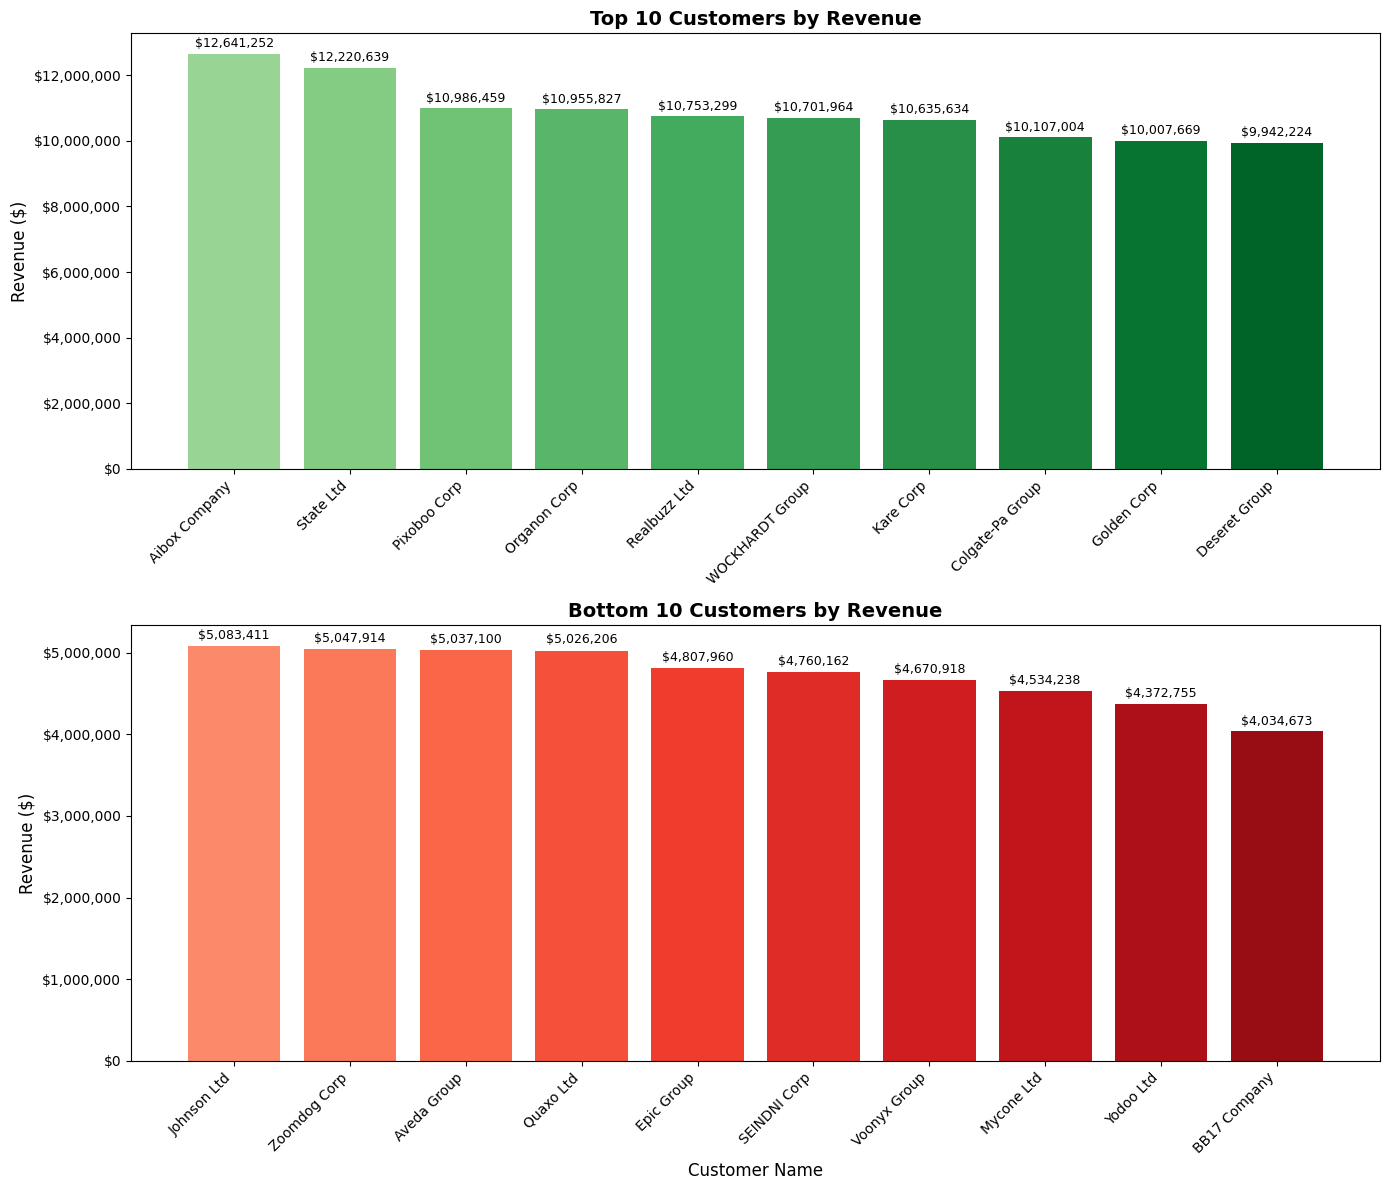

In [ ]:
customer_revenue = (
    df.groupby("customer_name")["revenue"].sum().sort_values(ascending=False)
)
top_10 = customer_revenue.head(10)
bottom_10 = customer_revenue.tail(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

colors1 = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_10)))
bars1 = ax1.bar(range(len(top_10)), top_10.values, color=colors1)
ax1.set_title("Top 10 Customers by Revenue", fontsize=14, fontweight="bold")
ax1.set_ylabel("Revenue ($)", fontsize=12)
ax1.set_xticks(range(len(top_10)))
ax1.set_xticklabels(top_10.index, rotation=45, ha="right")
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

for i, v in enumerate(top_10.values):
    ax1.text(i, v + v * 0.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

colors2 = plt.cm.Reds(np.linspace(0.4, 0.9, len(bottom_10)))
bars2 = ax2.bar(range(len(bottom_10)), bottom_10.values, color=colors2)
ax2.set_title("Bottom 10 Customers by Revenue", fontsize=14, fontweight="bold")
ax2.set_ylabel("Revenue ($)", fontsize=12)
ax2.set_xlabel("Customer Name", fontsize=12)
ax2.set_xticks(range(len(bottom_10)))
ax2.set_xticklabels(bottom_10.index, rotation=45, ha="right")
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

for i, v in enumerate(bottom_10.values):
    ax2.text(i, v + v * 0.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()